In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import os

In [ ]:
os.chdir(r'C:\SML_Projects\SML_hotelBooking_cancelling_prediction')

In [14]:
x_train = pd.read_csv('data/engineered/engineered_x_train.csv')
x_test = pd.read_csv('data/engineered/engineered_x_test.csv')

y_train = pd.read_csv('data/split/y_train.csv')
y_test = pd.read_csv('data/split/y_test.csv')

In [15]:
train_df = pd.concat([x_train, y_train], axis=1)
test_df = pd.concat([x_test, y_test], axis=1)

df = pd.concat([train_df, test_df], axis=0, ignore_index=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  float64
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_week_number        119390 non-null  float64
 4   arrival_date_day_of_month       119390 non-null  float64
 5   stays_in_weekend_nights         119390 non-null  float64
 6   stays_in_week_nights            119390 non-null  float64
 7   adults                          119390 non-null  float64
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  float64
 10  meal                            119390 non-null  object 
 11  country                         119390 non-null  object 
 12  market_segment  

In [17]:
df_fixed = df.copy()

numeric_features = df_fixed.select_dtypes(include=['int64', 'float64'])

target = df_fixed['is_canceled']

pearson_corr = numeric_features.corrwith(target)
print("=== Pearson correlation with is_canceled ===\n", pearson_corr)

spearman_corr = numeric_features.corrwith(target, method='spearman')
print("\n=== Spearman correlation with is_canceled ===\n", spearman_corr)

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3065: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_function_base_impl.py:3066: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


=== Pearson correlation with is_canceled ===
 lead_time                         0.293123
arrival_date_week_number          0.000500
arrival_date_day_of_month        -0.003858
stays_in_weekend_nights          -0.001791
stays_in_week_nights              0.024765
adults                            0.060017
children                          0.005069
babies                           -0.032491
is_repeated_guest                -0.084793
previous_cancellations            0.110133
previous_bookings_not_canceled   -0.057358
booking_changes                  -0.144381
agent                            -0.097390
days_in_waiting_list              0.054186
adr                               0.047557
required_car_parking_spaces      -0.195498
total_of_special_requests        -0.234658
total_nights                      0.017779
lead_time_log                     0.320063
is_extreme_lead                   0.104346
total_guests                      0.046540
is_free_booking                  -0.069990
has_prev

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]



=== Spearman correlation with is_canceled ===
 lead_time                         0.316635
arrival_date_week_number          0.000496
arrival_date_day_of_month        -0.003870
stays_in_weekend_nights          -0.004106
stays_in_week_nights              0.041418
adults                            0.067027
children                         -0.002724
babies                           -0.034306
is_repeated_guest                -0.084793
previous_cancellations            0.270233
previous_bookings_not_canceled   -0.115354
booking_changes                  -0.185107
agent                            -0.128425
days_in_waiting_list              0.098237
adr                               0.050876
required_car_parking_spaces      -0.197397
total_of_special_requests        -0.258520
total_nights                      0.036776
lead_time_log                     0.316635
is_extreme_lead                   0.104346
total_guests                      0.051410
is_free_booking                  -0.069990
has_pr

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 58 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   lead_time                       119390 non-null  float64
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_week_number        119390 non-null  float64
 4   arrival_date_day_of_month       119390 non-null  float64
 5   stays_in_weekend_nights         119390 non-null  float64
 6   stays_in_week_nights            119390 non-null  float64
 7   adults                          119390 non-null  float64
 8   children                        119390 non-null  float64
 9   babies                          119390 non-null  float64
 10  meal                            119390 non-null  object 
 11  country                         119390 non-null  object 
 12  market_segment  

In [19]:
from scipy.stats import f_oneway

target_col = 'is_canceled'

categorical_features = df.select_dtypes(include=['object']).columns

df_fixed = df.copy()

anova_results = {}

for col in categorical_features:
    if col == target_col:  
        continue

    groups = [df_fixed[df_fixed[col] == val][target_col] 
              for val in df_fixed[col].unique()]

    valid_groups = [g for g in groups if len(g) > 1]

    if len(valid_groups) > 1:
        f_stat, p_val = f_oneway(*valid_groups)
        anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}

anova_df = pd.DataFrame(anova_results).T.sort_values('p-value')
print("\nANOVA Results for Categorical Features vs is_canceled:\n")
print(anova_df)


ANOVA Results for Categorical Features vs is_canceled:

                       F-statistic        p-value
hotel                    79.122509   0.000000e+00
country                 118.793992   0.000000e+00
distribution_channel    966.740245   0.000000e+00
market_segment         1306.816553   0.000000e+00
assigned_room_type      512.775552   0.000000e+00
deposit_type          18014.486323   0.000000e+00
customer_type           754.862031   0.000000e+00
reserved_room_type       72.368334  4.771354e-134
meal                     76.250164   1.095002e-64
city                      1.381268   1.524623e-01
arrival_date_month        0.704564   7.354861e-01


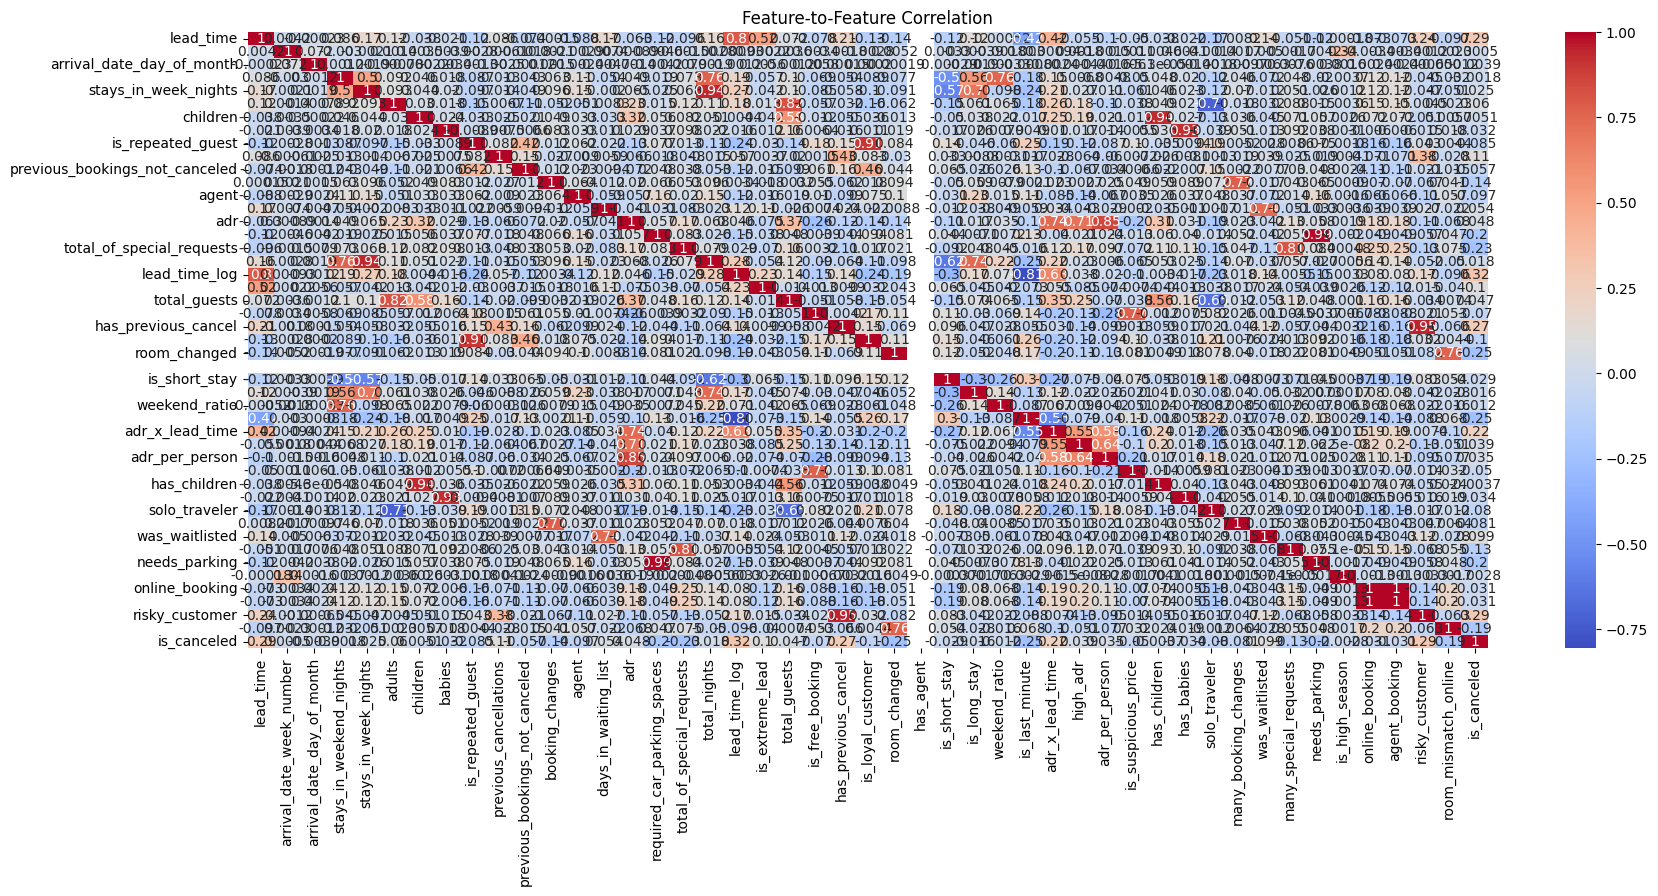

Highly correlated features to drop: ['total_nights', 'is_loyal_customer', 'has_children', 'has_babies', 'needs_parking', 'agent_booking', 'risky_customer']


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.heatmap(df[numeric_features.columns].corr(), annot=True, cmap='coolwarm')
plt.title("Feature-to-Feature Correlation")
plt.show()

corr_matrix = df[numeric_features.columns].corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
print("Highly correlated features to drop:", to_drop)

In [21]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)  
selector.fit(df[numeric_features.columns])

low_variance_features = numeric_features.columns[~selector.get_support()]
print("Low variance features (to drop):", list(low_variance_features))

Low variance features (to drop): ['babies', 'has_agent', 'is_suspicious_price', 'has_babies']


In [22]:
from sklearn.feature_selection import mutual_info_regression

mi = mutual_info_regression(df[numeric_features.columns], df['is_canceled'])
mi_series = pd.Series(mi, index=numeric_features.columns).sort_values()

print("Features ranked by mutual information:\n")
print(mi_series)

low_mi_threshold = 0.01

features_to_drop = list(mi_series[mi_series < low_mi_threshold].index)

print("\n=== FEATURES TO DROP (BY MUTUAL INFORMATION) ===")
for f in features_to_drop:
    print(f)

df_cleaned = df.drop(columns=features_to_drop)

Features ranked by mutual information:

is_long_stay                      0.000000
weekend_ratio                     0.000000
has_babies                        0.000000
is_suspicious_price               0.000000
is_high_season                    0.000000
agent_booking                     0.000308
stays_in_weekend_nights           0.000321
babies                            0.000324
is_short_stay                     0.000531
arrival_date_week_number          0.001022
has_children                      0.002007
many_booking_changes              0.002371
high_adr                          0.002728
children                          0.003189
online_booking                    0.003233
was_waitlisted                    0.003474
arrival_date_day_of_month         0.003762
adults                            0.003979
has_agent                         0.004593
is_free_booking                   0.004847
is_loyal_customer                 0.005700
solo_traveler                     0.005735
is_repeated_gu

In [23]:
categorical_features = df.select_dtypes(include=['object']).columns

low_info_cats = []

for col in categorical_features:
    top_freq = df[col].value_counts(normalize=True).iloc[0]
    if top_freq > 0.80:   
        low_info_cats.append(col)

print("Low-information categorical features:", low_info_cats)

Low-information categorical features: ['distribution_channel', 'deposit_type']
